In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
def integrate(f_x, a, b, step=1):
    '''
    Dividing into trapezoids.
    '''
    summation = sum(np.array([f_x(x) for x in np.arange(a, b, step=step)]))
    return summation * step

In [3]:
def plot_ct(t, x_t, x_label, y_label):
    plt.plot(t, x_t)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [4]:
def plot_dc(n, x_n, x_label, y_label):
    plt.stem(n, x_n)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Duration: 2.0s


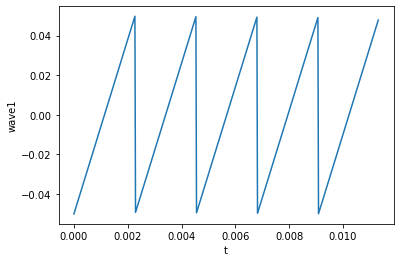

In [5]:
rate1, data1 = wavfile.read('wave1.wav')
print('Duration: {}s'.format(data1.shape[0] / rate1))
plot_ct(np.arange(0, 500/rate1, 1/rate1), data1[:500], 't', 'wave1')

Duration: 2.0s


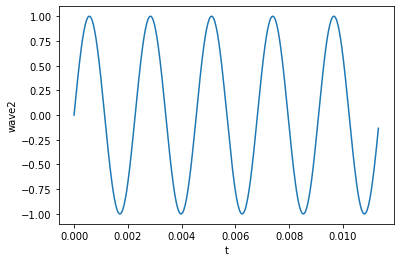

In [6]:
rate2, data2 = wavfile.read('wave2.wav')
print('Duration: {}s'.format(data2.shape[0] / rate2))
plot_ct(np.arange(0, 500/rate2, 1/rate2), data2[:500], 't', 'wave2')

Duration: 2.0s


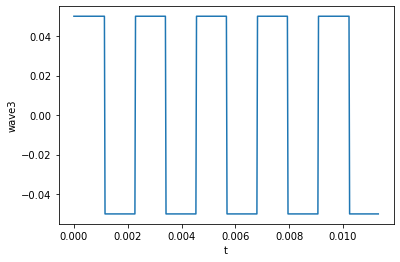

In [7]:
rate3, data3 = wavfile.read('wave3.wav')
print('Duration: {}s'.format(data3.shape[0] / rate3))
plot_ct(np.arange(0, 500/rate3, 1/rate3), data3[:500], 't', 'wave3')

Duration: 2.0s


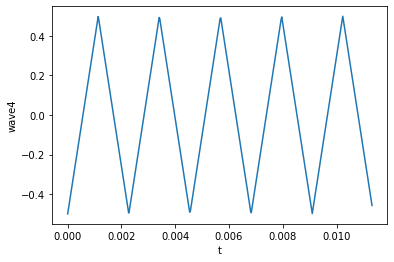

In [8]:
rate4, data4 = wavfile.read('wave4.wav')
print('Duration: {}s'.format(data4.shape[0] / rate4))
plot_ct(np.arange(0, 500/rate4, 1/rate4), data4[:500], 't', 'wave4')

Duration: 4.0s


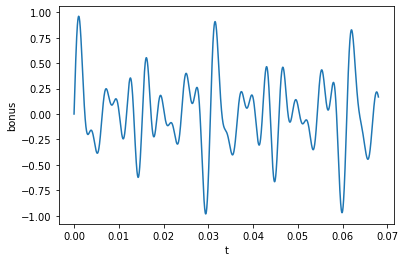

In [9]:
rate5, data5 = wavfile.read('bonus.wav')
print('Duration: {}s'.format(data5.shape[0] / rate5))
plot_ct(np.arange(0, 3000/rate5, 1/rate5), data5[:3000], 't', 'bonus')

In [10]:
def find_fourier_coefficients(k_interval, T, rate, x_t, y_t):
    a, b = k_interval
    coefficients = []
    for k in range(a, b+1):
        f_t = lambda t: x_t[int(t * rate)] * y_t(t * 2 * np.pi * k * rate / T)
        coefficients.append(integrate(f_t, 0, T/rate, 1/rate) * rate / T)
    return np.array(coefficients)  

In [11]:
b1_k, c1_k = find_fourier_coefficients((0, 10), 100, rate1, data1, np.cos), find_fourier_coefficients((0, 10), 100, rate1, data1, np.sin)
b2_k, c2_k = find_fourier_coefficients((0, 10), 100, rate2, data2, np.cos), find_fourier_coefficients((0, 10), 100, rate2, data2, np.sin)
b3_k, c3_k = find_fourier_coefficients((0, 10), 100, rate3, data3, np.cos), find_fourier_coefficients((0, 10), 100, rate3, data3, np.sin)
b4_k, c4_k = find_fourier_coefficients((0, 10), 100, rate4, data4, np.cos), find_fourier_coefficients((0, 10), 100, rate4, data4, np.sin)

In [12]:
a1_k = np.sqrt(b1_k ** 2 + c1_k ** 2)
a2_k = np.sqrt(b2_k ** 2 + c2_k ** 2)
a3_k = np.sqrt(b3_k ** 2 + c3_k ** 2)
a4_k = np.sqrt(b4_k ** 2 + c4_k ** 2)

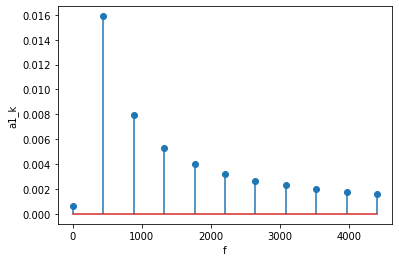

In [13]:
plot_dc(np.arange(0, 11 * rate1 / 100, rate1 / 100), a1_k, 'f', 'a1_k')

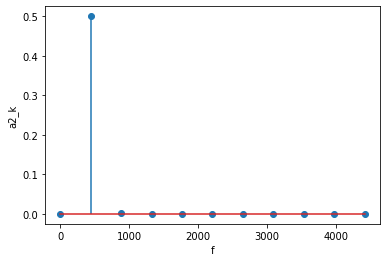

In [14]:
plot_dc(np.arange(0, 11 * rate2 / 100, rate2 / 100), a2_k, 'f', 'a2_k')

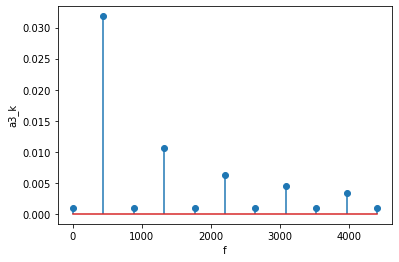

In [15]:
plot_dc(np.arange(0, 11 * rate3 / 100, rate3 / 100), a3_k, 'f', 'a3_k')

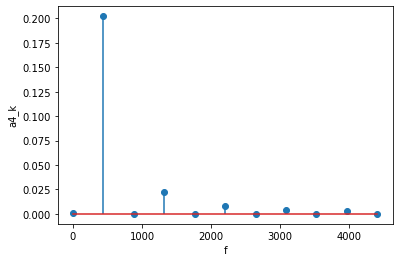

In [16]:
plot_dc(np.arange(0, 11 * rate4 / 100, rate4 / 100), a4_k, 'f', 'a4_k')

In [17]:
b5_k, c5_k = find_fourier_coefficients((0, 10), 229.34, rate5, data5, np.cos), find_fourier_coefficients((0, 10), 229.34, rate5, data5, np.sin)

In [18]:
a5_k = np.sqrt(b5_k ** 2 + c5_k ** 2)

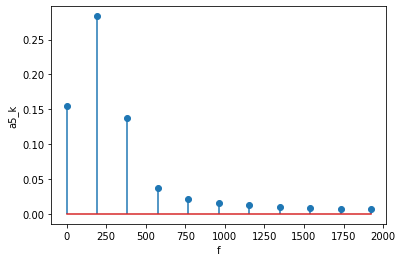

In [19]:
plot_dc(np.arange(0, 11 * rate4 / 229.34, rate4 / 229.34), a5_k, 'f', 'a5_k')